In [113]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *
from adaptive import *
from FRSolver import * 

%matplotlib inline

In [114]:
variances = pd.read_csv('Data/Fig8/Fig8VarianceAnomaly/variances.csv')

exs = np.linspace(0.05,0.15,200)
eys = np.flip(np.linspace(-0.14, -0.19, 100))

In [115]:
variances = np.array(variances)

In [116]:
max_index = np.unravel_index(np.argmax(variances), variances.shape)
print(max_index)
ex = exs[max_index[0]]
ey = eys[max_index[1]]
print(ex, ey)

(145, 68)
0.1228643216080402 -0.15565656565656566


In [117]:
# gravity
G = 1

m1 = 1 
m2 = 1 
m3 = 1

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")
r3 = np.array([-1,0.0,0.0], dtype="float64")

p1 = 0.347111
p2 = 0.532728

# velocity 
v1 = np.array([-2 * p1,-2*p2,0], dtype="float64")
v2 = np.array([p1,p2,0], dtype="float64")
v3 = np.array([p1,p2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])

masses = np.array([m1, m2, m3])

E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

pxhat = p1 + ex
pyhat = p2 + ey

# velocity 
v1hat = np.array([pxhat,pyhat,0], dtype="float64")
v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
v3hat = np.array([pxhat,pyhat,0], dtype="float64") 
v0shat = np.array([v1hat,v2hat,v3hat])

R = findR(v0shat, E0, masses)

# position
r1hat = np.array([-R,0.0,0.0], dtype="float64") 
r2hat = np.array([0,0.0,0.0], dtype="float64")
r3hat = np.array([R,0.0,0.0], dtype="float64")
r0shat = np.array([r1hat,r2hat,r3hat])


rcom, vcom = CentreOfMass(r0shat, v0shat, masses)
v0shat -= vcom
r0shat -= rcom

In [119]:
print(v0shat, r0shat)

[[ 0.46997532  0.37707143  0.        ]
 [-0.93995064 -0.75414287  0.        ]
 [ 0.46997532  0.37707143  0.        ]] [[-1.05204531  0.          0.        ]
 [ 0.          0.          0.        ]
 [ 1.05204531  0.          0.        ]]


In [120]:
C = 0.3
T = 1000

In [121]:
traj, stability = fullSolver(T, C, r0shat, v0shat, G, masses, hlim = 1e-6)
print(stability)

3


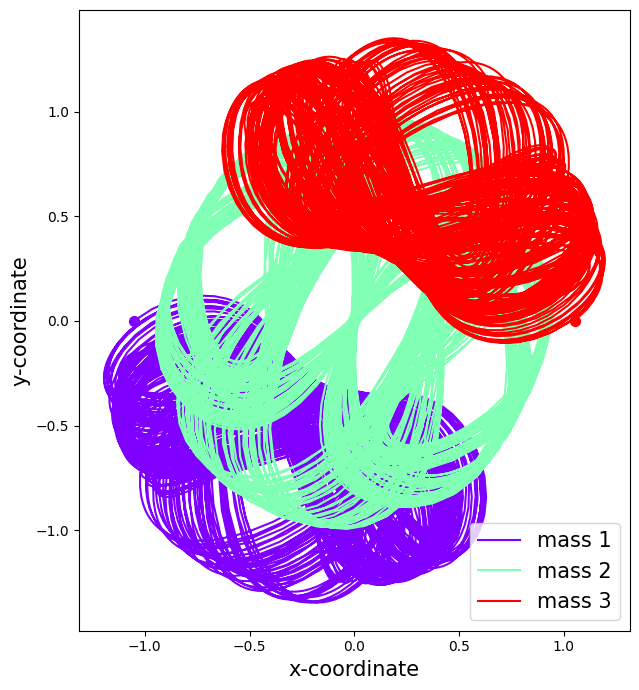

In [122]:
PlotOrbits(traj)

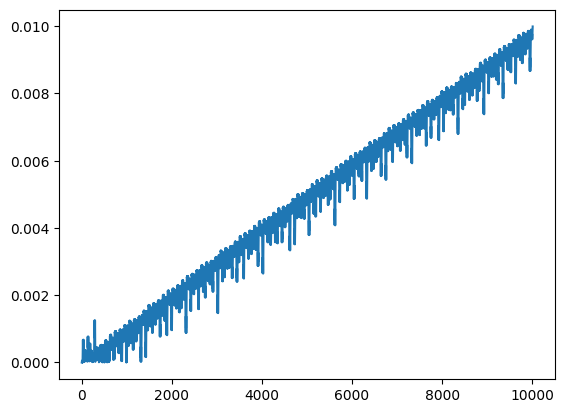

In [123]:
plt.plot(traj[3])

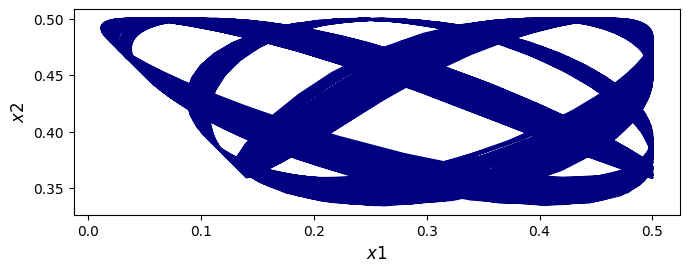

In [124]:
r_traj = traj[1]
path = np.array([distCalculator(rs) for rs in r_traj])
PlotPath(path, figsize = (7,7))

In [125]:
C = 0.3
T = 100

In [126]:
traj, stability = fullSolver(T, C, r0shat, v0shat, G, masses, hlim = 1e-6)
print(stability)

1


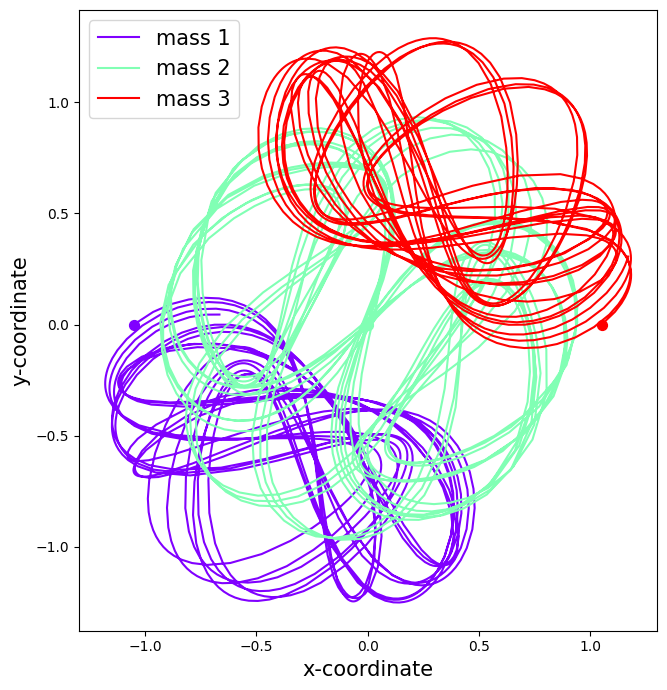

In [127]:
PlotOrbits(traj)
plt.savefig('Plots/3Body/Anomaly/Anomalous 3-body orbit, traj')

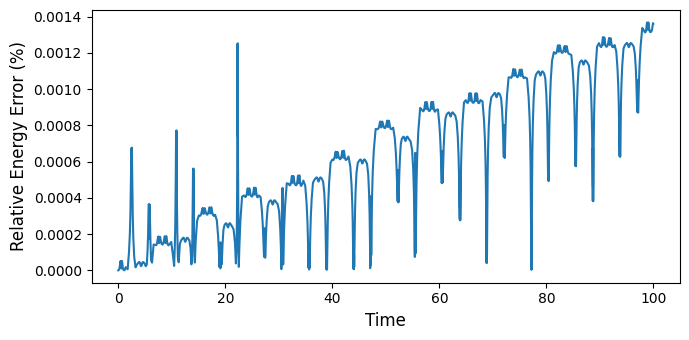

In [128]:
PlotTotalEnergy(traj, figsize = (7, 3.5))
plt.savefig('Plots/3Body/Anomaly/Anomalous 3-body orbit, Energy')

In [129]:
r_traj = traj[1]
path = np.array([distCalculator(rs) for rs in r_traj])

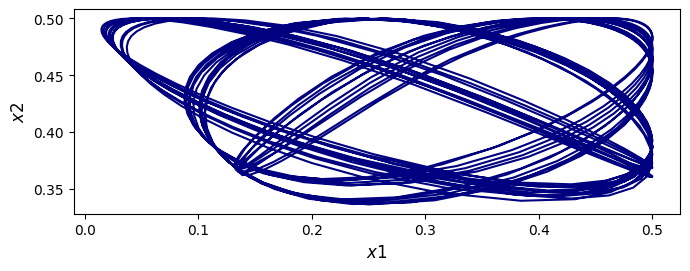

In [130]:
PlotPath(path, figsize = (7,7))
plt.tight_layout()
plt.savefig('Plots/3Body/Anomaly/Anomalous 3-body orbit, tri-plot')



In [131]:
exs = np.linspace(0.10350000000000001-0.001,0.10350000000000001+0.001,51)
eys = np.linspace(-0.1514-0.001, -0.1514+0.001, 51)

In [132]:
print(exs, eys)

[0.1025  0.10254 0.10258 0.10262 0.10266 0.1027  0.10274 0.10278 0.10282
 0.10286 0.1029  0.10294 0.10298 0.10302 0.10306 0.1031  0.10314 0.10318
 0.10322 0.10326 0.1033  0.10334 0.10338 0.10342 0.10346 0.1035  0.10354
 0.10358 0.10362 0.10366 0.1037  0.10374 0.10378 0.10382 0.10386 0.1039
 0.10394 0.10398 0.10402 0.10406 0.1041  0.10414 0.10418 0.10422 0.10426
 0.1043  0.10434 0.10438 0.10442 0.10446 0.1045 ] [-0.1524  -0.15236 -0.15232 -0.15228 -0.15224 -0.1522  -0.15216 -0.15212
 -0.15208 -0.15204 -0.152   -0.15196 -0.15192 -0.15188 -0.15184 -0.1518
 -0.15176 -0.15172 -0.15168 -0.15164 -0.1516  -0.15156 -0.15152 -0.15148
 -0.15144 -0.1514  -0.15136 -0.15132 -0.15128 -0.15124 -0.1512  -0.15116
 -0.15112 -0.15108 -0.15104 -0.151   -0.15096 -0.15092 -0.15088 -0.15084
 -0.1508  -0.15076 -0.15072 -0.15068 -0.15064 -0.1506  -0.15056 -0.15052
 -0.15048 -0.15044 -0.1504 ]


In [133]:
C = 0.3
T = 300

In [134]:
# gravity
G = 1

m1 = 1 
m2 = 1 
m3 = 1

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")
r3 = np.array([-1,0.0,0.0], dtype="float64")

p1 = 0.347111
p2 = 0.532728

# velocity 
v1 = np.array([-2 * p1,-2*p2,0], dtype="float64")
v2 = np.array([p1,p2,0], dtype="float64")
v3 = np.array([p1,p2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])

masses = np.array([m1, m2, m3])

E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

stabilities = []
rs_trajs = []
ts_trajs = []
vs_trajs = []
Es_trajs = []
for ex in exs:
    for ey in eys:
        print(ex, ey)
        pxhat = p1 + ex
        pyhat = p2 + ey

        # velocity 
        v1hat = np.array([pxhat,pyhat,0], dtype="float64")
        v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
        v3hat = np.array([pxhat,pyhat,0], dtype="float64")
        v0shat = np.array([v1hat,v2hat,v3hat])

        R = findR(v0shat, E0, masses)
        
        # position
        r1hat = np.array([-R,0.0,0.0], dtype="float64")
        r2hat = np.array([0,0.0,0.0], dtype="float64")
        r3hat = np.array([R,0.0,0.0], dtype="float64")
        r0shat = np.array([r1hat,r2hat,r3hat])
        

        traj, stability = fullSolver(T, C, r0shat, v0shat, G, masses)

        ts_traj = traj[0]
        rs_traj = traj[1]
        vs_traj = traj[2]
        Es_traj = traj[3]
        ts_trajs.append(ts_traj)
        rs_trajs.append(rs_traj)
        vs_trajs.append(vs_trajs)
        Es_trajs.append(Es_trajs)
        stabilities.append(stability)

0.10250000000000001 -0.1524
0.10250000000000001 -0.15236
0.10250000000000001 -0.15232
0.10250000000000001 -0.15228
0.10250000000000001 -0.15224000000000001
0.10250000000000001 -0.1522
0.10250000000000001 -0.15216000000000002
0.10250000000000001 -0.15212
0.10250000000000001 -0.15208000000000002
0.10250000000000001 -0.15204
0.10250000000000001 -0.152
0.10250000000000001 -0.15196
0.10250000000000001 -0.15192
0.10250000000000001 -0.15188000000000001
0.10250000000000001 -0.15184
0.10250000000000001 -0.15180000000000002
0.10250000000000001 -0.15176
0.10250000000000001 -0.15172
0.10250000000000001 -0.15168
0.10250000000000001 -0.15164
0.10250000000000001 -0.1516
0.10250000000000001 -0.15156
0.10250000000000001 -0.15152000000000002
0.10250000000000001 -0.15148
0.10250000000000001 -0.15144000000000002
0.10250000000000001 -0.1514
0.10250000000000001 -0.15136
0.10250000000000001 -0.15132
0.10250000000000001 -0.15128
0.10250000000000001 -0.15124
0.10250000000000001 -0.1512
0.10250000000000001 -0.1

In [135]:
variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=1000)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance(GS=1000).csv")

In [136]:
variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=500)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance(GS=500).csv")

In [137]:
variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=300)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance(GS=300).csv")

In [138]:
print(len(variances))

2601


In [139]:
# df = pd.DataFrame(ts_trajs)
# df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/ts_trajs.csv")

# df = pd.DataFrame(rs_trajs)
# df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/rs_trajs.csv")

# df = pd.DataFrame(vs_trajs)
# df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/vs_trajs.csv")

# df = pd.DataFrame(stabilities)
# df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/stabilities.csv")

# df = pd.DataFrame(Es_trajs)
# df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Es_trajs.csv")

In [140]:
variances = np.array(variances).reshape(len(exs), len(eys))

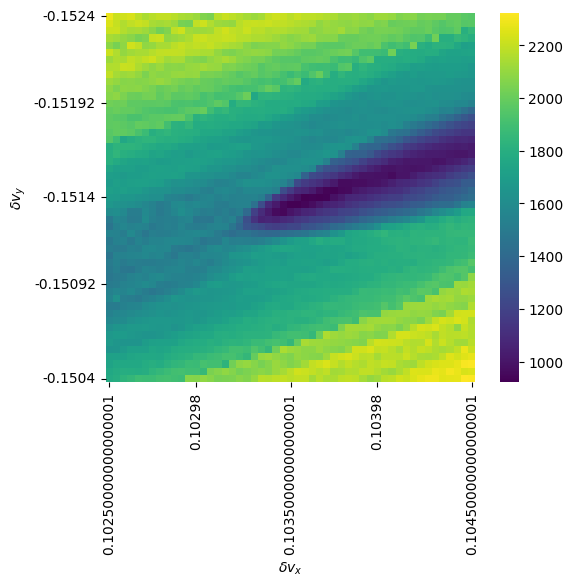

In [141]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(variances.T,cmap = 'viridis',  cbar=True, ax=ax)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(exs[tick_positionsx])
ax.set_yticklabels(eys[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()

In [142]:
index = np.unravel_index(np.argmin(variances), variances.shape)

In [143]:
exs = np.linspace(exs[index[0]]-0.0001,exs[index[0]]+0.0001,51)
eys = np.linspace(eys[index[1]]-0.0001,eys[index[1]]+0.0001, 51)

In [144]:
# gravity
G = 1

m1 = 1 
m2 = 1 
m3 = 1

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")
r3 = np.array([-1,0.0,0.0], dtype="float64")

p1 = 0.347111
p2 = 0.532728

# velocity 
v1 = np.array([-2 * p1,-2*p2,0], dtype="float64")
v2 = np.array([p1,p2,0], dtype="float64")
v3 = np.array([p1,p2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])

masses = np.array([m1, m2, m3])

E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

stabilities = []
rs_trajs = []
ts_trajs = []
vs_trajs = []
Es_trajs = []
for ex in exs:
    for ey in eys:
        print(ex, ey)
        pxhat = p1 + ex
        pyhat = p2 + ey

        # velocity 
        v1hat = np.array([pxhat,pyhat,0], dtype="float64")
        v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
        v3hat = np.array([pxhat,pyhat,0], dtype="float64")
        v0shat = np.array([v1hat,v2hat,v3hat])

        R = findR(v0shat, E0, masses)
        
        # position
        r1hat = np.array([-R,0.0,0.0], dtype="float64")
        r2hat = np.array([0,0.0,0.0], dtype="float64")
        r3hat = np.array([R,0.0,0.0], dtype="float64")
        r0shat = np.array([r1hat,r2hat,r3hat])
        

        traj, stability = fullSolver(T, C, r0shat, v0shat, G, masses)

        ts_traj = traj[0]
        rs_traj = traj[1]
        vs_traj = traj[2]
        Es_traj = traj[3]
        ts_trajs.append(ts_traj)
        rs_trajs.append(rs_traj)
        vs_trajs.append(vs_trajs)
        Es_trajs.append(Es_trajs)
        stabilities.append(stability)

0.10344 -0.15145999999999998
0.10344 -0.15145599999999998
0.10344 -0.15145199999999998
0.10344 -0.15144799999999997
0.10344 -0.151444
0.10344 -0.15144
0.10344 -0.151436
0.10344 -0.15143199999999998
0.10344 -0.15142799999999998
0.10344 -0.15142399999999998
0.10344 -0.15142
0.10344 -0.151416
0.10344 -0.151412
0.10344 -0.151408
0.10344 -0.15140399999999998
0.10344 -0.15139999999999998
0.10344 -0.151396
0.10344 -0.151392
0.10344 -0.151388
0.10344 -0.151384
0.10344 -0.15138
0.10344 -0.15137599999999998
0.10344 -0.151372
0.10344 -0.151368
0.10344 -0.151364
0.10344 -0.15136
0.10344 -0.151356
0.10344 -0.151352
0.10344 -0.15134799999999998
0.10344 -0.151344
0.10344 -0.15134
0.10344 -0.151336
0.10344 -0.151332
0.10344 -0.151328
0.10344 -0.151324
0.10344 -0.15132
0.10344 -0.151316
0.10344 -0.151312
0.10344 -0.151308
0.10344 -0.151304
0.10344 -0.1513
0.10344 -0.151296
0.10344 -0.151292
0.10344 -0.151288
0.10344 -0.151284
0.10344 -0.15128
0.10344 -0.151276
0.10344 -0.15127200000000002
0.10344 -0.15

In [145]:
variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=1000)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance2(GS=1000).csv")

variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=500)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance2(GS=500).csv")

variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=300)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance2(GS=300).csv")

In [146]:
variances = np.array(variances).reshape(len(exs), len(eys))
stabilities = np.array(stabilities).reshape(len(exs),len(eys))

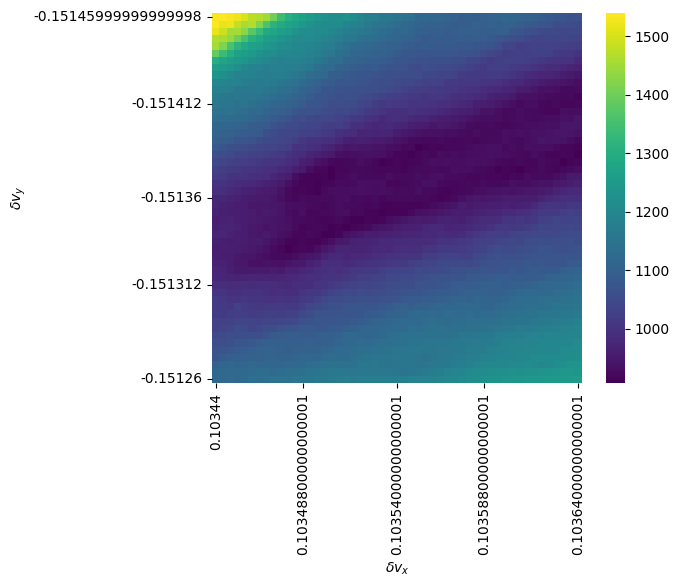

In [147]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(variances.T,cmap = 'viridis',  cbar=True, ax=ax)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(exs[tick_positionsx])
ax.set_yticklabels(eys[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()

In [148]:
index = np.unravel_index(np.argmin(variances), variances.shape)

In [149]:
exs = np.linspace(exs[index[0]]-0.000001,exs[index[0]]+0.000001,51)
eys = np.linspace(eys[index[1]]-0.000001,eys[index[1]]+0.000001, 51)

In [150]:
print(exs.T[46])
print(eys[46])

0.10350484000000001
-0.15137515999999998


In [151]:
# gravity
G = 1

m1 = 1 
m2 = 1 
m3 = 1

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")
r3 = np.array([-1,0.0,0.0], dtype="float64")

p1 = 0.347111
p2 = 0.532728

# velocity 
v1 = np.array([-2 * p1,-2*p2,0], dtype="float64")
v2 = np.array([p1,p2,0], dtype="float64")
v3 = np.array([p1,p2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])

masses = np.array([m1, m2, m3])

E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

stabilities = []
rs_trajs = []
ts_trajs = []
vs_trajs = []
Es_trajs = []
for ex in exs:
    for ey in eys:
        print(ex, ey)
        pxhat = p1 + ex
        pyhat = p2 + ey

        # velocity 
        v1hat = np.array([pxhat,pyhat,0], dtype="float64")
        v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
        v3hat = np.array([pxhat,pyhat,0], dtype="float64")
        v0shat = np.array([v1hat,v2hat,v3hat])

        R = findR(v0shat, E0, masses)
        
        # position
        r1hat = np.array([-R,0.0,0.0], dtype="float64")
        r2hat = np.array([0,0.0,0.0], dtype="float64")
        r3hat = np.array([R,0.0,0.0], dtype="float64")
        r0shat = np.array([r1hat,r2hat,r3hat])
        

        traj, stability = fullSolver(T, C, r0shat, v0shat, G, masses)

        ts_traj = traj[0]
        rs_traj = traj[1]
        vs_traj = traj[2]
        Es_traj = traj[3]
        ts_trajs.append(ts_traj)
        rs_trajs.append(rs_traj)
        vs_trajs.append(vs_trajs)
        Es_trajs.append(Es_trajs)
        stabilities.append(stability)

0.10350300000000001 -0.15137699999999998
0.10350300000000001 -0.15137695999999998
0.10350300000000001 -0.15137691999999997
0.10350300000000001 -0.15137688
0.10350300000000001 -0.15137683999999998
0.10350300000000001 -0.15137679999999998
0.10350300000000001 -0.15137675999999997
0.10350300000000001 -0.15137672
0.10350300000000001 -0.15137667999999999
0.10350300000000001 -0.15137663999999998
0.10350300000000001 -0.15137659999999997
0.10350300000000001 -0.15137656
0.10350300000000001 -0.15137652
0.10350300000000001 -0.15137647999999998
0.10350300000000001 -0.15137643999999997
0.10350300000000001 -0.1513764
0.10350300000000001 -0.15137636
0.10350300000000001 -0.15137631999999998
0.10350300000000001 -0.15137627999999997
0.10350300000000001 -0.15137624
0.10350300000000001 -0.1513762
0.10350300000000001 -0.15137615999999998
0.10350300000000001 -0.15137611999999998
0.10350300000000001 -0.15137608
0.10350300000000001 -0.15137604
0.10350300000000001 -0.15137599999999998
0.10350300000000001 -0.151

In [152]:
variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=1000)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance3(GS=1000).csv")

variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=500)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance3(GS=500).csv")

variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=300)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance3(GS=300).csv")

In [178]:
variances = np.array(pd.read_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance3(GS=1000).csv"))[:,1]

In [179]:
print(variances)

[1951. 1951. 1951. ... 1957. 1958. 1958.]


In [180]:
variances = np.array(variances).reshape(len(exs), len(eys))
stabilities = np.array(stabilities).reshape(len(exs),len(eys))

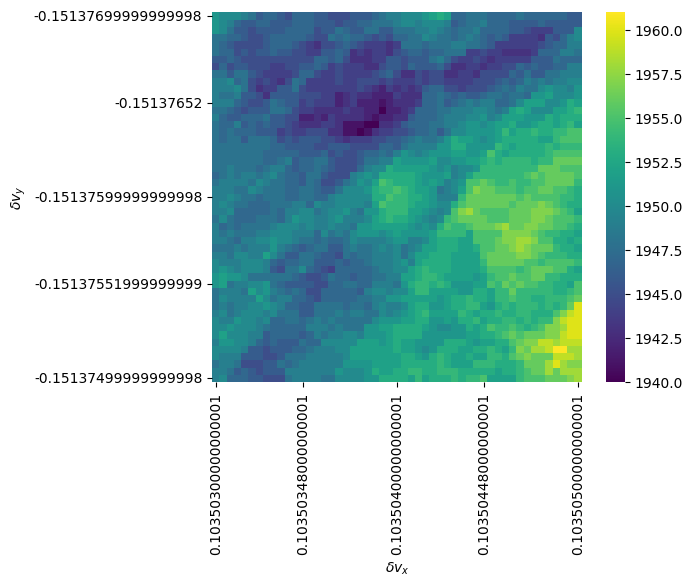

In [181]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(variances.T,cmap = 'viridis',  cbar=True, ax=ax)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(exs[tick_positionsx])
ax.set_yticklabels(eys[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()

In [183]:
index = np.unravel_index(np.argmin(variances), variances.shape)
print(exs[index[0]], eys[index[1]])

0.1035038 -0.15137636


In [188]:
exs = np.linspace(exs[index[0]]-0.0000001,exs[index[0]]+0.0000001,51)
eys = np.linspace(eys[index[1]]-0.0000001,eys[index[1]]+0.0000001, 51)

In [189]:
# gravity
G = 1

m1 = 1 
m2 = 1 
m3 = 1

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")
r3 = np.array([-1,0.0,0.0], dtype="float64")

p1 = 0.347111
p2 = 0.532728

# velocity 
v1 = np.array([-2 * p1,-2*p2,0], dtype="float64")
v2 = np.array([p1,p2,0], dtype="float64")
v3 = np.array([p1,p2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])

masses = np.array([m1, m2, m3])

E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

stabilities = []
rs_trajs = []
ts_trajs = []
vs_trajs = []
Es_trajs = []
for ex in exs:
    for ey in eys:
        print(ex, ey)
        pxhat = p1 + ex
        pyhat = p2 + ey

        # velocity 
        v1hat = np.array([pxhat,pyhat,0], dtype="float64")
        v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
        v3hat = np.array([pxhat,pyhat,0], dtype="float64")
        v0shat = np.array([v1hat,v2hat,v3hat])

        R = findR(v0shat, E0, masses)
        
        # position
        r1hat = np.array([-R,0.0,0.0], dtype="float64")
        r2hat = np.array([0,0.0,0.0], dtype="float64")
        r3hat = np.array([R,0.0,0.0], dtype="float64")
        r0shat = np.array([r1hat,r2hat,r3hat])
        

        traj, stability = fullSolver(T, C, r0shat, v0shat, G, masses)

        ts_traj = traj[0]
        rs_traj = traj[1]
        vs_traj = traj[2]
        Es_traj = traj[3]
        ts_trajs.append(ts_traj)
        rs_trajs.append(rs_traj)
        vs_trajs.append(vs_trajs)
        Es_trajs.append(Es_trajs)
        stabilities.append(stability)

0.1035037 -0.15137646
0.1035037 -0.151376456
0.1035037 -0.151376452
0.1035037 -0.151376448
0.1035037 -0.151376444
0.1035037 -0.15137644
0.1035037 -0.151376436
0.1035037 -0.15137643199999998
0.1035037 -0.15137642799999998
0.1035037 -0.15137642399999998
0.1035037 -0.15137641999999998
0.1035037 -0.15137641599999999
0.1035037 -0.151376412
0.1035037 -0.151376408
0.1035037 -0.151376404
0.1035037 -0.1513764
0.1035037 -0.151376396
0.1035037 -0.151376392
0.1035037 -0.151376388
0.1035037 -0.15137638399999997
0.1035037 -0.15137637999999998
0.1035037 -0.15137637599999998
0.1035037 -0.15137637199999998
0.1035037 -0.15137636799999998
0.1035037 -0.15137636399999999
0.1035037 -0.15137636
0.1035037 -0.151376356
0.1035037 -0.151376352
0.1035037 -0.151376348
0.1035037 -0.151376344
0.1035037 -0.15137634
0.1035037 -0.151376336
0.1035037 -0.15137633199999997
0.1035037 -0.15137632799999998
0.1035037 -0.15137632399999998
0.1035037 -0.15137631999999998
0.1035037 -0.15137631599999998
0.1035037 -0.15137631199999

In [205]:
print(E0)

-1.287144495085


In [190]:
variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=1000)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance4(GS=1000).csv")

variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=500)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance4(GS=500).csv")

variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=300)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance4(GS=300).csv")

In [198]:
variances = np.array(pd.read_csv("Data/Fig8/Fig8VarianceAnomaly/Zoomed/Variance4(GS=1000).csv"))[:,1]

In [199]:
variances = np.array(variances).reshape(len(exs), len(eys))
stabilities = np.array(stabilities).reshape(len(exs),len(eys))

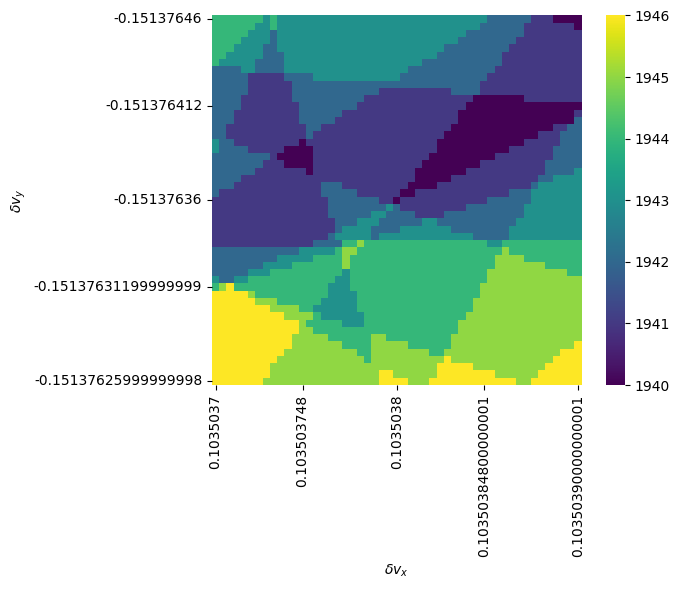

In [200]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(variances.T,cmap = 'viridis',  cbar=True, ax=ax)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(exs[tick_positionsx])
ax.set_yticklabels(eys[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()

In [201]:
index = np.unravel_index(np.argmin(variances), variances.shape)
print(exs[index[0]], eys[index[1]])

0.103503736 -0.15137638399999997


In [202]:
# gravity
G = 1

m1 = 1 
m2 = 1 
m3 = 1

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")
r3 = np.array([-1,0.0,0.0], dtype="float64")

p1 = 0.347111
p2 = 0.532728

# velocity 
v1 = np.array([-2 * p1,-2*p2,0], dtype="float64")
v2 = np.array([p1,p2,0], dtype="float64")
v3 = np.array([p1,p2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])

masses = np.array([m1, m2, m3])

E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

pxhat = p1 +exs[index[0]]
pyhat = p2 +eys[index[1]]

# velocity 
v1hat = np.array([pxhat,pyhat,0], dtype="float64")
v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
v3hat = np.array([pxhat,pyhat,0], dtype="float64") 
v0shat = np.array([v1hat,v2hat,v3hat])

R = findR(v0shat, E0, masses)

# position
r1hat = np.array([-R,0.0,0.0], dtype="float64") 
r2hat = np.array([0,0.0,0.0], dtype="float64")
r3hat = np.array([R,0.0,0.0], dtype="float64")
r0shat = np.array([r1hat,r2hat,r3hat])


rcom, vcom = CentreOfMass(r0shat, v0shat, masses)
v0shat -= vcom
r0shat -= rcom

In [203]:
traj, stability = fullSolver(T, C, r0shat, v0shat, G, masses, hlim = 1e-6)

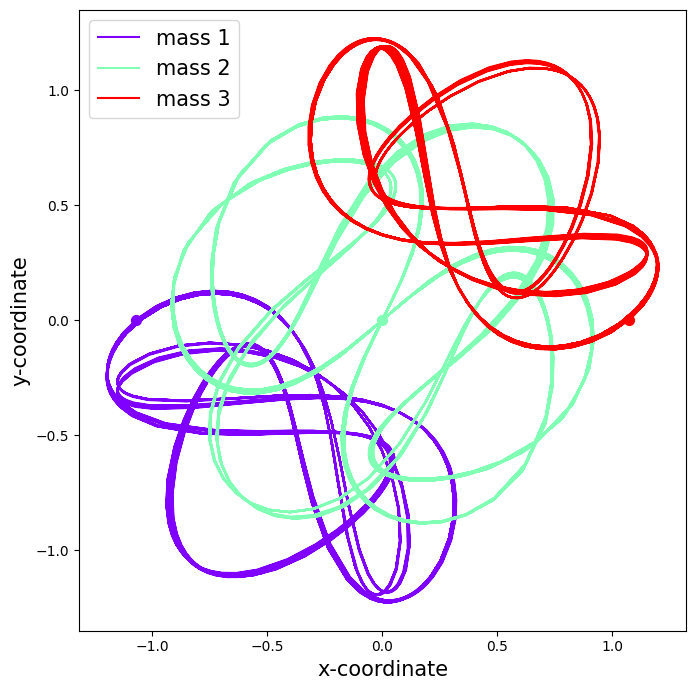

In [204]:
PlotOrbits(traj)

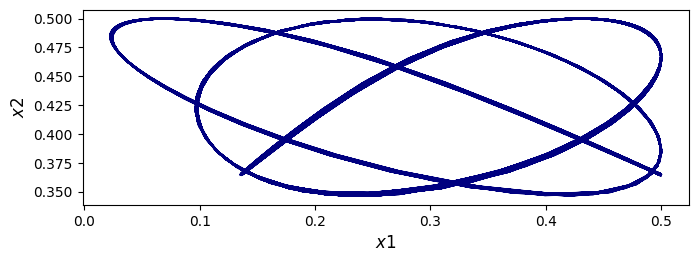

In [186]:
r_traj = traj[1]
path = np.array([distCalculator(rs) for rs in r_traj])
PlotPath(path, figsize = (7,7))